## Sección de Importación de Librerias

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Leyendo el Archivo de Datos

In [4]:
df=pd.read_csv('ds_salaries.csv')
Describe=df.describe(include='all').T
cols = df.columns

## Organizando los Datos 

In [5]:
df_sorted=df.sort_values('salary_in_usd',ascending=False)
Pdf=df.pivot_table(index='job_title',columns='experience_level',values='salary_in_usd')
Pdf=Pdf.dropna()
x=Pdf.loc['Data Analyst']

## Análisis Frecuencia Tipos de Trabajo -- Sección 1

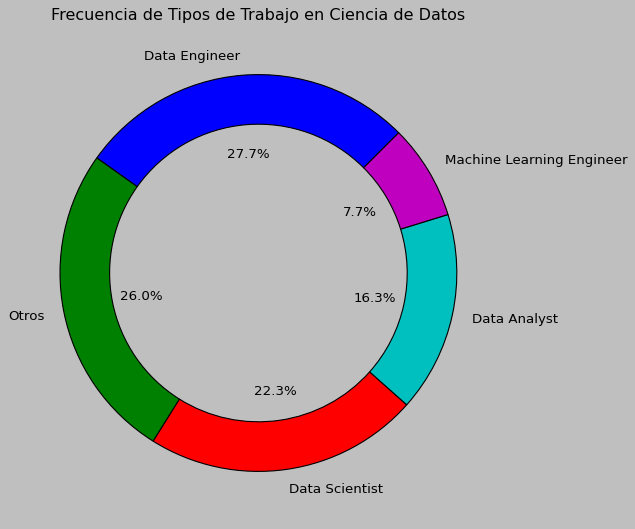

In [6]:
# Calculando Cantidad o Conteo de Tipos de Trabajo
job_title_counts = df['job_title'].value_counts()

# Determinación de un Límite de Frecuencia por debajo de 10
low_frequency_titles = job_title_counts[job_title_counts < 120].index

# Reemplazando estos valores con en el Data Frame con Un solo Conjunto ('Otros')
df['others_job_title'] = df['job_title'].apply(lambda x: "Otros" if x in low_frequency_titles else x)

# Recalculando Cantidad o Frecuencia 
adjusted_counts = df['others_job_title'].value_counts()

# Gráfica de Torta o Pastel
plt.style.use('classic')
fig1=plt.figure(figsize=(8,10))
Labels1=adjusted_counts.index.tolist()
plt.pie(adjusted_counts,autopct='%.1f%%', startangle=45, wedgeprops=dict(width=0.25),labels=Labels1)
plt.title('Frecuencia de Tipos de Trabajo en Ciencia de Datos')
plt.ylabel('') 
plt.show()

**Análisis Sección 1** --> 
Según la base de datos trabajada a partir de un Dataset proveniente de datos recolectados Glassdoor, linkedIn y otras fuentes de datos publicadas proveniente de Harish Kumar. (2023).https://doi.org/10.34740/KAGGLE/DSV/6264882 

Evidenciamos en primera instancia la frecuencia del titulo, perfil o tipo de trabajado que se encuentra publicado en estos sitios. Donde el 27,7 % son Data Engineer, el 22,3% son Data Scientist, el 16,3% son Data Analyst, el 7,7% son Machine Learning Engineer. Además, el 26% de los posiciones es representanda por pequeños porcentajes de otros puestos de trabajo, cómo Research Scientist, Data Science Manager, Data Science Tech Lead, Principal Data Scientist, Head of Data, BI Engineer, Entre otros... 

Insights: 
- 3/4 de las posiciones en el área pertenecen a 4 perfiles. 
- El 26% de las posiciones se dividen en puestos o perfiles con bastante especificidad. 
- Solo el perfil de Data Engineer y Data Scientist son el 50% de lo que representa el mercado de los puestos en Ciencia de Datos.

Esto ultimo puede ser una referencia que nos identifica lo completas que deben ser las habilidades de esos perfiles para representar un % tan alto. 

## Análisis de Experiencia en Ciencia de Datos --> Sección 2

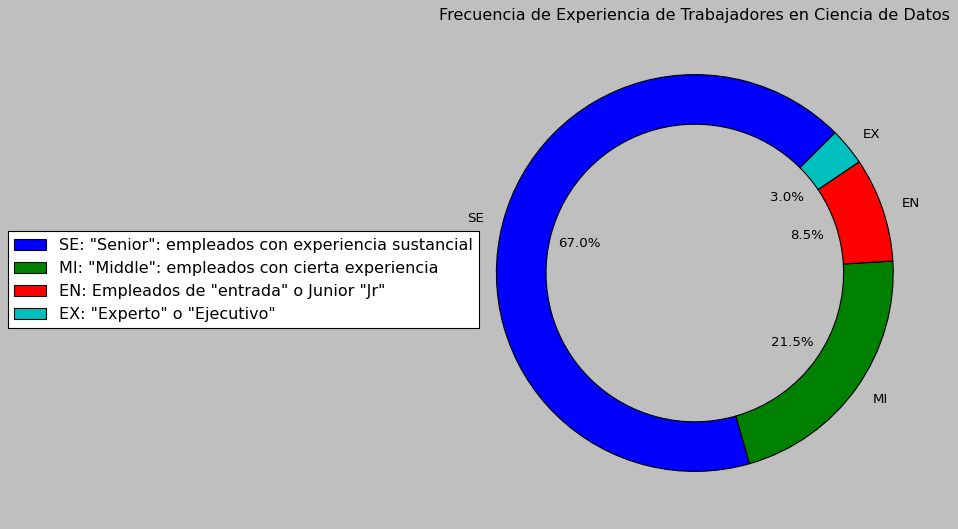

In [8]:
# Calculando Cantidad o Conteo de Experiencia en Trabajadores
job_experienced_counts = df['experience_level'].value_counts()

# Gráfica de Torta 
plt.style.use('classic')

# Leyenda del Gráfico
Labels2 = ['SE', 'MI', 'EN', 'EX']

# Diccionario que contiene las descripciones
descripciones = {
    'EN': 'Empleados de "entrada" o Junior "Jr"',
    'MI': '"Middle": empleados con cierta experiencia',
    'SE': '"Senior": empleados con experiencia sustancial',
    'EX': '"Experto" o "Ejecutivo"'
}
# Figura y el gráfico de Torta
fig2 = plt.figure(figsize=(8, 10))
wedges, texts, autotexts = plt.pie(job_experienced_counts, autopct='%.1f%%', startangle=45, wedgeprops=dict(width=0.25),labels=Labels2)

#Creando una leyenda personalizada
custom_legend = [f'{label}: {descripciones[label]}' for label in Labels2]
legend = plt.legend(wedges, custom_legend, bbox_to_anchor=(0.082, 0.60))

# Mostrar el gráfico
plt.title('Frecuencia de Experiencia de Trabajadores en Ciencia de Datos')
plt.ylabel('')
plt.show()


**Análisis Sección 2** --> 

En primera instancia se evidencia que la experiencia de trabajadores en el mundo de la ciencia de datos, muestra que la mayor cantidad de los datos encontrados en las fuentes mencionadas, nos indican que la mayoria de los profesionales del área o los más solicitados, se encuentran en el rango de Senior con un 67%, viniendo detrás los empleados que se encuentran en el rango de middle 21,5% y posteriormente los entry level o junior con un 8,5%, por ultimo los Expertos o Ejecutivos con un 3%.

Esto podría dejarnos varias interrogantes considerando que los datos son una muestra considerable de la población total.

Insights: 

- Casi 3/4 de las posiciones en el área de los datos son Senior, quienes tienen una experiencia relevante en el mundo de la Datos tienen mayores oportunidades o son los más buscados, casi el 70% de los perfiles recolectados se encuentran en está categoria. 

- La diferencia con los middle y los entry es demasiado amplia, considerando que los executive o C'Levels siempre van a ser menos.

- Ahora, esto nos deja algunas interrogantes: 

    **¿Faltan Entry Level en el mundo de la Ciencia de Datos?** 

    **¿El tipo de profesional que se dedica a la ciencia de datos, es un profesional que comúnmente ya tiene experiencia?** 

    **¿Es un área donde las empresas exigen mayor experticia y por ello los empleados deben ser experimentados?**

## Análisis Frecuencia Experiencia por Tipo de Trabajo --> Sección 3

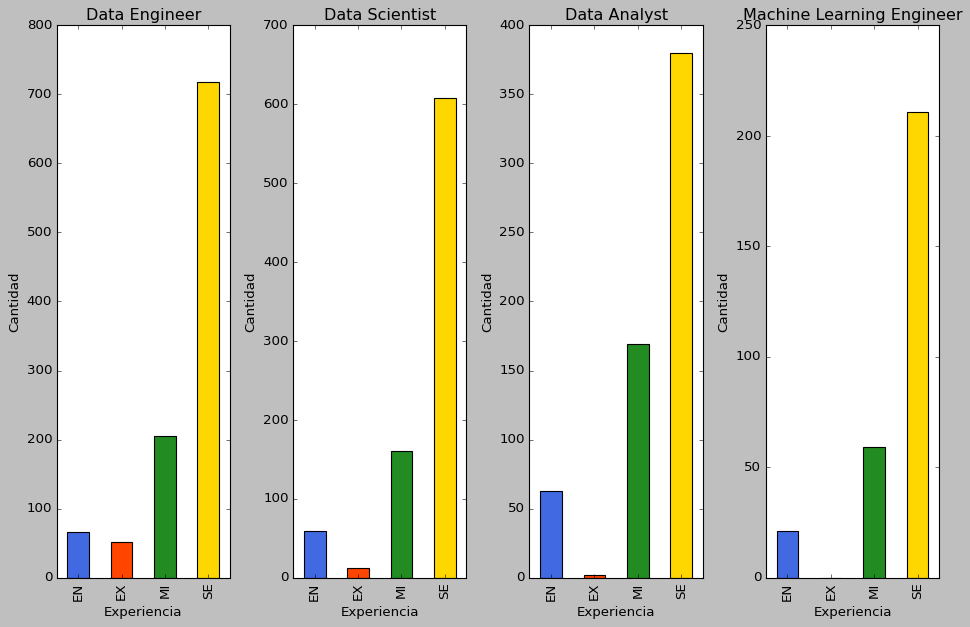

In [13]:
# Trabajos con mayor frecuencia --> 4 primeros 
common_titles=job_title_counts.nlargest(4).index   

# Filtrando el Data Frame en función de los trabajos más comunes, 
# la función .isin con la lista de common_titles, devuelve una lista booleana. 
filtered_df = df[df['job_title'].isin(common_titles)] 

# Al hacer la búsqueda con la lista booleana, tenemos el dataframe filtrado. 
# Agrupando con .groupby en función de 'job_title' y 'experience_level'
grouped = filtered_df.groupby(['job_title', 'experience_level']).size().unstack().fillna(0) 
# La función me cuenta número de elementos en columna 
# la función unstack elimina el stack del groupby al hacer el doble filtrado y coloca uno como indice 
# y el otro como columna y la función fillna rellena los vacios con 0 

# Ordenando el DataFrame Agrupado en función del conteo anteriormente hecho
ordered_grouped = grouped.reindex(job_title_counts.index).dropna()
#print(ordered_grouped)


tipos=ordered_grouped.index
tipos_de_trabajo=[0,1,2,3]
colores = ['royalblue', 'orangered', 'forestgreen', 'gold']

#Creando una sola figura
fig,axes=plt.subplots(nrows=1,ncols=len(tipos_de_trabajo), figsize=(12, 2*len(tipos_de_trabajo)))
# Crear gráficos separados para cada tipo de trabajo
for i,trabajo in enumerate(tipos_de_trabajo):
    
    # Obtener la fila correspondiente al tipo de trabajo actual
    fila_trabajo = ordered_grouped.iloc[trabajo]
    ax=axes[i]
    # Graficar barras apiladas para el tipo de trabajo actual
    fila_trabajo.plot(kind='bar',color=colores,stacked=True,ax=ax)
  
    # Personalizar el gráfico
    ax.set_title(f'{common_titles[i]}')
    ax.set_xlabel('Experiencia')
    ax.set_ylabel('Cantidad')
plt.tight_layout()     
plt.show()



**Análisis Sección 3** --> 
Se puede identificar que en los 4 tipos de trabajo más comúnes dentro de la ciencia de datos, el perfil más buscado 
es el de Senior, tal como se podría anticipar debido a que son los puestos más buscados o existentes en el área.

También se evidencia que existen más expertos o C-levels en los perfiles de Data Engineer y Data Scientist, por ultimo se puede observar como el perfil de Data Analyst es el que proporcionalmente tiene mayor existencia o recurrencia de Entry y Mid-Level respecto a los Senior. 

Insights: 
- El número de Machine Learning Engineer en puestos expertos o C-levels, es 0. Por lo tanto es un perfil demandado pero que actualmente podría relacionarse a actividade bastantes operativos en espaciosd de desarrollo de IA aplicada. 

- De estos 4 perfiles, el que tiene una mayor relevancia con puestos Mid y Entry es el perfil de Data Analyst donde la suma de estas posiciones representan más del 50% de lo que serían las posiciones Senior, cosa que no se puede aseverar con los otros perfiles. 

- Los Data Engineer y los Data Scientist tienen una mayor cantidad de profesionales que se desempeñan como expertos, tal vez debido a que profesiones y perfiles que requieren además de habilidades técnicas un conjunto de habilidades blandas y experiencias que van de la mano con avanzar hacia estas posiciones. 

## Análisis de Salarios por Perfil --> Sección 4

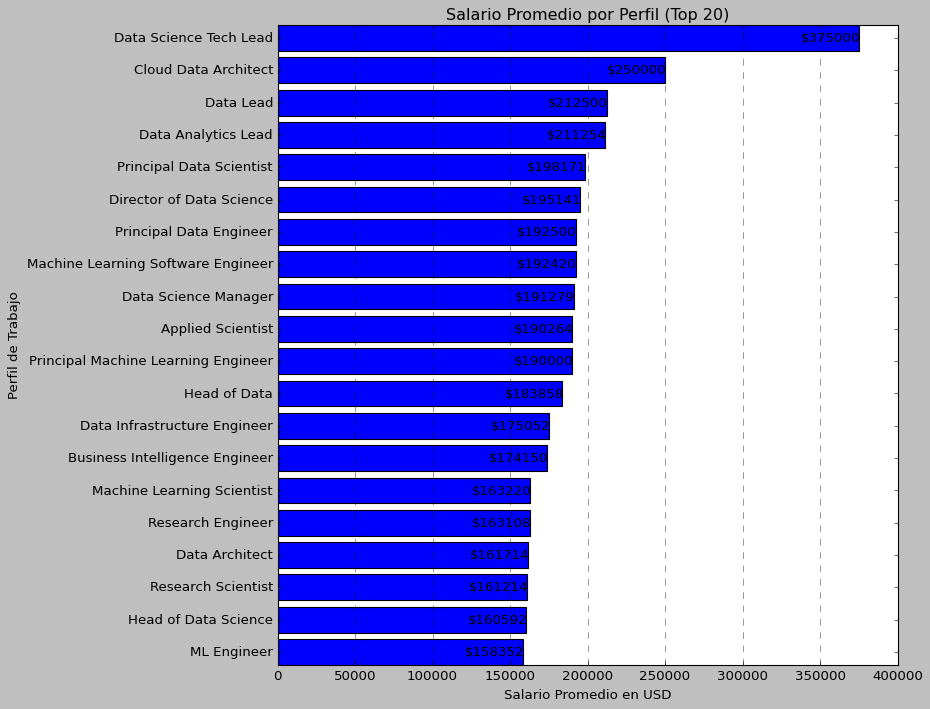

In [14]:
#Agrupando por tipo de trabajo y por sueldo o salario, además calculando la media y re indexando.
prom_sueldo=df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Organizando los valores por cantidad de salario
prom_sueldo=prom_sueldo.sort_values(by='salary_in_usd',ascending=False).head(20)

#Reorganizando para que se vea mejor en el gráfico 
prom_sueldo=prom_sueldo.sort_values(by='salary_in_usd',ascending=True)

#Estilo e Inicio del Gráfico 
plt.style.use('fast')
plt.figure(figsize=(10,10))
bars = plt.barh(prom_sueldo['job_title'], prom_sueldo['salary_in_usd'],align='center')
plt.title(f'Salario Promedio por Perfil (Top {20})')
plt.ylabel('Perfil de Trabajo')
plt.xlabel('Salario Promedio en USD')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el valor de Salario Promedio en el extremo Izquierdo
for bar in bars:
    width = bar.get_width()
    plt.text(width + 800, bar.get_y() + bar.get_height()/2, f"${int(round(width, 0))}", va='center', ha='right')  
# El llamado objeto (Rectanglge) .get_width devuelve el ancho del rectangulo del gráfico de barras 
# y la estoy identificando como posición en X + 800
# La posición en Y está basada en la coordenada base del renctangulo, 
# como get_y es el piso del rectangulo + la mitad del alto del rectangulo para que quede en la mitad de la barra 
# Luego el texto que es el siguiente renglón, es la transformación y redondeo del valor del ancho la barra. 
# luego va (verticalalignment) centrado y el ha (horizontalalignment) right para que lo coloque a la derecha de la posición establecida 

plt.show()

**Análisis Sección 4** --> 

El top 20 de posiciones respecto a sueldos, muestran que la posición de Data Science Tech Lead tiene una ventaja amplia respecto a otros perfiles, de más de 100.000$ de diferencia. 

Luego este top está conformado por puestos de Lead, Head, Manager, Principal o Director. 

Posteriormente, se obsrva la influencia de la implementación de modelos de Machine Learning en el mercado, ya que también hay posiciones (4) de Machine Learning de manera repetida. Los efectos de la Oferta y demanda. Por ultimo todos estos puestos tienen ofertas superiores al 150.000$ por año. 

## Análisis Salarios 4 perfiles más comunes--> Sección 5

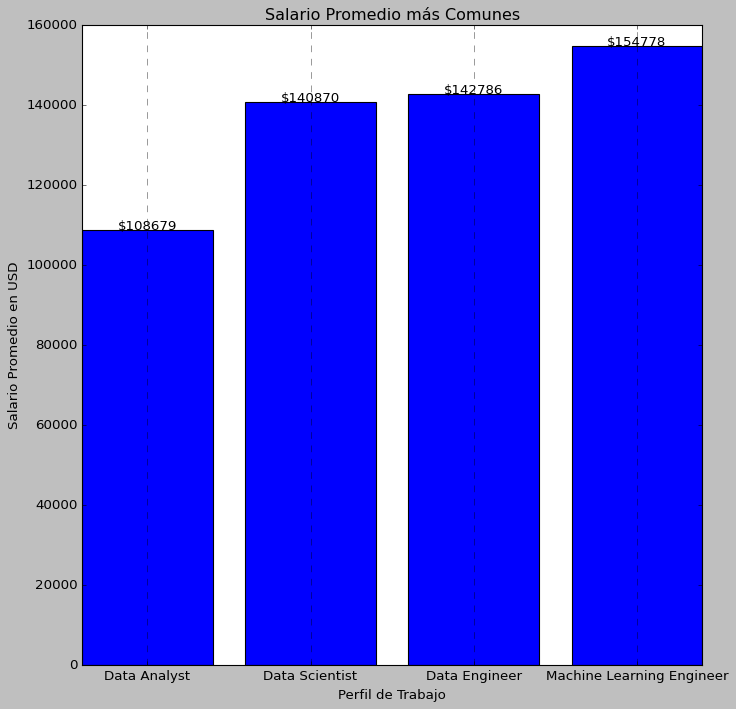

In [15]:
#Agrupando por tipo de trabajo más común y por sueldo o salario, además calculando la media y re indexando.
prom_common=filtered_df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Organizando los valores por cantidad de salario
prom_common=prom_common.sort_values(by='salary_in_usd',ascending=False)

#Reorganizando para que se vea mejor en el gráfico 
prom_common=prom_common.sort_values(by='salary_in_usd',ascending=True)

#Estilo e Inicio del Gráfico 
plt.style.use('fast')
plt.figure(figsize=(10,10))
bars = plt.bar(prom_common['job_title'], prom_common['salary_in_usd'],align='center')
plt.title(f'Salario Promedio más Comunes')
plt.ylabel('Salario Promedio en USD')
plt.xlabel('Perfil de Trabajo')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el valor de Salario Promedio en el Centro del Tope de la barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f"${int(round(height, 0))}", va='center', ha='center')
plt.show()

**Análisis Sección 5** --> 

Con respecto a los 4 perfiles más comunes, el primero de la lista es la posición de Machine Learning Engineer, relacionado con lo que se menciona en el análisis del top 20, con solo una diferencia 12.000-14.000$ encontramos los puestos de Data Engineer y Data Scientist respectivamente.

Y por ultimo con una diferencia significativa de casi 50.000$ se encuentra el perfil de Data Analyst, tal vez un perfil de transición para mucho profesionales dentro del mundo de la Ciencia de Datos y que en casos donde no es específico, vemos que tiene un rango salarial en el que su media se aleja de los otros perfiles más buscados o comunes. 

## Análisis Salarios por Experiencia--> Sección 6

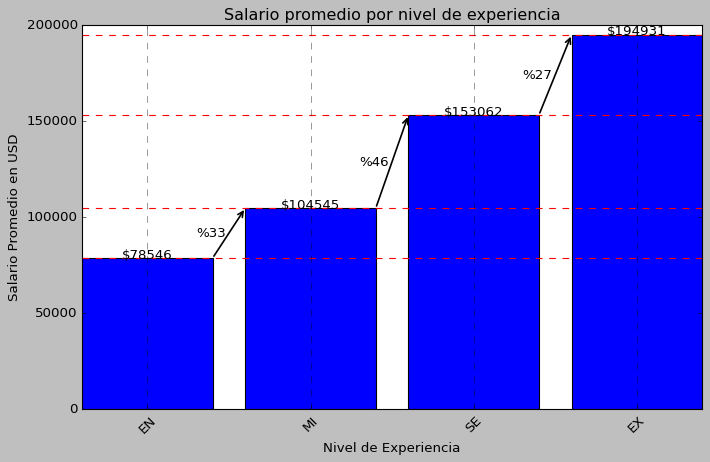

In [22]:
# Media de los salarios para niveles de experiencia 
prom_sueldo_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Organizando 
prom_sueldo_exp=prom_sueldo_exp.sort_values(by='salary_in_usd',ascending=True)

#Estilo e Inicio del Gráfico 
plt.style.use('fast')
plt.figure(figsize=(10,6))
sueldos = plt.bar(prom_sueldo_exp['experience_level'], prom_sueldo_exp['salary_in_usd'],align='center')
plt.title(f'Salario promedio por nivel de experiencia')
plt.ylabel('Salario Promedio en USD')
plt.xlabel('Nivel de Experiencia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Mostrar el valor de Salario Promedio en el Centro del Tope de la barra
for i in sueldos:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2, height + 1750, f"${int(round(height, 0))}", va='center', ha='center')

# Poniendo el % diferencial entre cada tope de salario o el gap entre niveles de experiencia
for i in range(len(sueldos)-1):
    inicio_altura = sueldos[i].get_height()
    final_altura = sueldos[i+1].get_height()
    incremento_por=((final_altura-inicio_altura)/inicio_altura)*100
    plt.axhline(y = final_altura, color = 'r', linestyle = '--', label='Promedio por Experiencia')
    ini_punto = (sueldos[i].get_x() + sueldos[i].get_width(), inicio_altura)
    fin_punto = (sueldos[i+1].get_x(), final_altura)
    plt.annotate(
        '', 
        xy=fin_punto, 
        xytext=ini_punto, 
        arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
    )
    plt.text(sueldos[i].get_x() + sueldos[i].get_width() - 0.1, (final_altura-inicio_altura)/2 + inicio_altura, f"%{int(round(incremento_por, 0))}", va='center', ha='left')

plt.axhline(y=sueldos[0].get_height(),color = 'r', linestyle = '--', label='Promedio por Experiencia')
plt.show()

**Análisis Sección 6** --> 

En este análisis se nota que existe una diferencia entre cada nivel de experiencia, donde el salto real de diferencia porcentual se encuentra entre los Entry level y los Senior, con una diferencia porcentual del 94%, prácticamente el doble. 

Y luego encontramos aumentos relativamente progresivos, entre 33% y el 46%. Siendo representativa la diferencia que hay entre los Mid y los Senior, un gap de casi el 50% entre esos dos rangos de experiencia. 

 ## Análisis Proyección Salarios por Año --> Sección  7

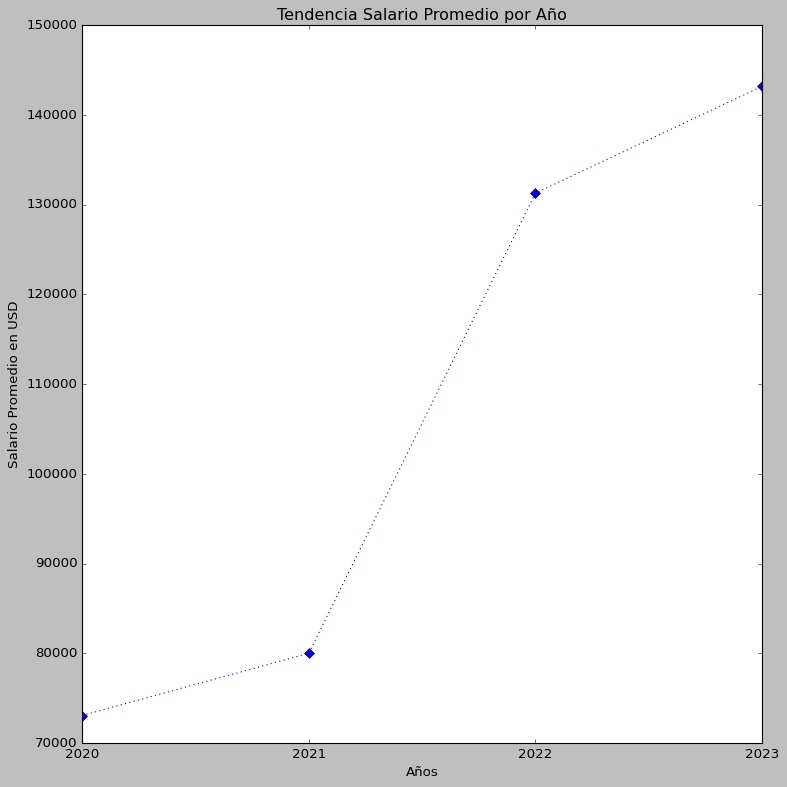

In [25]:
# Salario Promedio por Año 
tendencia_año = df.groupby('work_year')['salary_in_usd'].median().reset_index()

# Convertir 'work_year' en cadenas porqué de lo contrario lee los datos como nùmeros 
tendencia_año['work_year'] = tendencia_año['work_year'].astype(str)

# Establecer 'work_year' como el índice
tendencia_año.set_index('work_year', inplace=True)

x=tendencia_año.index
y=tendencia_año['salary_in_usd']

#Estilo e Inicio del Gráfico
plt.figure(figsize=(10,10))
plt.plot(x,y,'bD:')
plt.title(f'Tendencia Salario Promedio por Año')
plt.ylabel('Salario Promedio en USD')
plt.xlabel('Años')

plt.tight_layout()
plt.show()

**Análisis Sección 7** --> 

Por ultimo encontramos como ha sido el comportamiento del promedio de los salarios en los últimos años, donde se nota un cambio importante en la pendiente del crecimiento del promedio de sueldos entre el año 2021 y el 2022, lo cual puede estar relacionado a varios aspectos de los sucesos en el mercado laboral, gran cantidad de inversión en tecnología en el año 2021, el boom de la implementación de modelos de IA, principalmente basados en Machine Learning. 

A pesar de esto, la tendencia sigue al alza y los puestos relacionados al área de la Ciencia parecen seguir en demanda. 

Este sección puede ser complementada con otros análisis de dispersión y complementarios que pretendo considerar para futuras actualizaciones de este proyecto. 